In [16]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
# data_dir='E:\ECG detection Example\Data_Pre'
# data=tf.keras.utils.image_dataset_from_directory(data_dir)
# class_names = data.class_names
# class_names


In [17]:
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Dropout, MaxPooling2D
from keras import regularizers
_rotate_range = 180
_size = (128, 128)
_batch_size = 32
_filters = (4, 4)
_epochs = 30
_regularizers = 0.0001
_probability_to_change = 0.30

def create_model():
        model = Sequential()

        model.add(Conv2D(64, _filters, input_shape=(_size[0], _size[1], 3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(_regularizers, _regularizers), activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, _filters, kernel_regularizer=regularizers.l2(_regularizers), 
                padding='same',activation='relu'))
        model.add(MaxPooling2D())
        model.add(Dropout(0.20))

        model.add(Conv2D(128, _filters, kernel_regularizer=regularizers.l2(_regularizers), 
                padding='same',activation='relu'))
        model.add(Conv2D(128, _filters, kernel_regularizer=regularizers.l2(_regularizers),
                padding='same',activation='relu'))
        model.add(MaxPooling2D())
        model.add(Dropout(0.20))

        model.add(Conv2D(256, _filters, kernel_regularizer=regularizers.l2(_regularizers), 
                padding='same',activation='relu'))
        model.add(Conv2D(256, _filters, kernel_regularizer=regularizers.l2(_regularizers), 
                padding='same',activation='relu'))
        model.add(MaxPooling2D())
        model.add(Dropout(0.20))

        model.add(Flatten())
        model.add(Dense(512, kernel_regularizer=regularizers.l2(_regularizers), activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        return model
model=create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      3136      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       1

In [18]:
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping

IMAGE_SIZE = [128, 128]
batch_size=32
model_set=[]

earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')

train='E:/ECG detection Example/DataTrain/Data2/Train'
validation='E:/ECG detection Example/DataTrain/Data2/Validation'

filepath = "E:\ECG detection Example\Model"
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

gen = ImageDataGenerator()
train_generator = gen.flow_from_directory(
train,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=batch_size)

valid_generator = gen.flow_from_directory(
validation,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=batch_size)


# print(model.summary())
model=create_model()
history=model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=2400//batch_size,
    validation_steps=800//batch_size,
    # callbacks=callbacks_list)
    callbacks=[earlyStopping],)

model.save("E:\ECG detection Example\Model\model5.hdf5")



Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 666s 9s/step - loss: 1.5510 - accuracy: 0.7383 - val_loss: 1.2374 - val_accuracy: 0.5000
Epoch 2/10
75/75 [==============================] - 666s 9s/step - loss: 0.3078 - accuracy: 0.9633 - val_loss: 0.9036 - val_accuracy: 0.4975
Epoch 3/10
75/75 [==============================] - 651s 9s/step - loss: 0.2294 - accuracy: 0.9867 - val_loss: 0.4955 - val_accuracy: 0.8338
Epoch 4/10
75/75 [==============================] - 633s 8s/step - loss: 0.2051 - accuracy: 0.9871 - val_loss: 0.2942 - val_accuracy: 0.9775
Epoch 5/10
75/75 [==============================] - 660s 9s/step - loss: 0.1851 - accuracy: 0.9871 - val_loss: 0.2802 - val_accuracy: 0.9737
Epoch 6/10
75/75 [==============================] - 644s 9s/step - loss: 0.1734 - accuracy: 0.9871 - val_loss: 0.2261 - val_accuracy: 0.9800
Epoch 7/10
75/75 [==============================] - 621s 8s/step - loss

In [ ]:
loss=[1.0878,0.2957,0.2357,0.1922,0.1689,0.1591,0.1572,0.1334,0.1278,0.1254]
accuracy=[0.7063, 0.9621,0.9779,0.9842,0.9875,0.9887,0.9858,0.9908,0.9921,0.9946]

val_loss=[0.8714,0.2851,0.1918,0.1912,0.1816,0.1696,0.861,0.5800,0.7096,0.1155]
val_accuracy=[ 0.8675,0.9700,0.9900,0.9850,0.9737,0.9887,0.8975,0.7362,0.6050,0.9987]

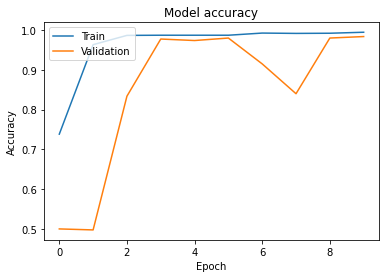

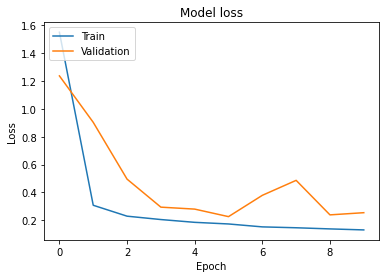

In [19]:

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=round(precision_score(y_true, y_pred,average='weighted'),6)
    f1Score=round(f1_score(y_true, y_pred, average='weighted'),6)
    print("Accuracy  : {} %".format(accuracy*100))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [4]:
import warnings
warnings.filterwarnings('ignore')
from glob import glob
from collections import Counter
from keras.models import load_model
import numpy as np
import cv2


#from csv_to_image import directory
directory1="E:/ECG detection Example/DataTrain/Data2/Test/AFIB"
directory2="E:/ECG detection Example/DataTrain/Data2/Test/NSR"

AFIB = glob(directory1 + '/*.png')
NSR = glob(directory2 + '/*.png')
arr=[AFIB,NSR]
model = load_model('E:/ECG detection Example/Model/model4.hdf5')
y_true=np.concatenate((np.zeros((1,2*200)),np.ones((1,2*200))),axis=1)


yPredictions = []
for images in arr[:]:
    
    for i in images:
        image = cv2.imread(i)
        pred = model.predict(image.reshape((1, 128, 128, 3)))
        
        y_classes = pred.argmax(axis=-1)
        yPredictions.append(y_classes[0])   

print("***Performance on Validation data***")    
valAcc, valPrec, valFScore = my_metrics(y_true[0], yPredictions)

***Performance on Validation data***
Accuracy  : 96.75 %
Precision : 0.968918
f1Score : 0.967475
[[376  24]
 [  2 398]]


In [3]:
print("***Performance on Validation data***")    
valAcc, valPrec, valFScore = my_metrics(y_true[0], yPredictions)

***Performance on Validation data***
Accuracy  : 99.75 %
Precision : 0.9975
f1Score : 0.9975
[[399   1]
 [  1 399]]


model2: 165, 110
model3: 198, 112
model4: 162, 166